# PGI Research

 This Notebook contains pyhton code for the analysis performed for paper 
 
 '**A cross -sectional study to assess the prevalence, perception of causes of headache and treatment seeking behaviour among nursing personnel at   government tertiary level health care facility in northern India**'

## Loading Data and analysis preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):

Mounted at /content/drive


In [2]:
!pip install XlsxWriter
!sudo dpkg --configure -a
!sudo apt install msttcorefonts -qq
!rm ~/.cache/matplotlib -rf

Setting up python3-distro-info (0.18ubuntu0.18.04.1) ...
Setting up libmspack0:amd64 (0.6-3ubuntu0.3) ...
Setting up python3-six (1.11.0-2) ...
Setting up python3-pkg-resources (39.0.1-2) ...
Setting up xfonts-encodings (1:1.0.4-2) ...
Setting up cabextract (1.6-1.1) ...
Setting up python3-debconf (1.5.66ubuntu1) ...
Setting up python3-chardet (3.0.4-1) ...
Setting up python3-debian (0.1.32) ...
Setting up xfonts-utils (1:7.7+6) ...
Setting up python3-distupgrade (1:18.04.45) ...
Setting up python3-update-manager (1:18.04.11.13) ...
Setting up ubuntu-release-upgrader-core (1:18.04.45) ...
Setting up update-manager-core (1:18.04.11.13) ...
Setting up update-notifier-common (3.192.1.12) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
The following packages w

In [3]:
import pandas as pd
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np
import xlsxwriter
from PIL import Image, ImageOps, ImageDraw, ImageFont
import openpyxl as opxl
from openpyxl.styles import PatternFill
#from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest, kstest, mannwhitneyu, rankdata 
from scipy.stats import wilcoxon, kruskal, brunnermunzel, probplot 
from scipy.stats import skewtest, kurtosistest
from scipy.stats import contingency, fisher_exact, chi2_contingency
from scipy.stats import pearsonr, spearmanr, kendalltau, t

In [4]:
data = pd.read_excel('/content/drive/MyDrive/PGIresearch/RawData.xlsx',sheet_name='Tool1')

## Data Preprocessing

#### Dropping unrequired/not significant features 

In [5]:
data = data.drop(['s.no','Name','Phone','qualification','Preffered','SpecificHeadache'],axis=1)

#### Cleaning up Data

In [6]:
for index, row in data.iterrows():
  if row['age'] < 10:
    data.at[index,'age'] = 25 
  if row['gender'] in ['f','F']:
    data.at[index,'gender'] = 'Female'
  else:
    data.at[index,'gender'] = 'Male'
  if (re.search(r'ICU',row['Area']) or (row['Area'] in ['ATC-RECOVERY','ATC-R','ACT-R','ATC- R','ICCU','CCU','HHDU','BMTx. CENTRE'])):
    data.at[index,'Area'] = 'ICU'
  else:
    data.at[index,'Area'] = 'NON-ICU'
  if row['religion'] in ['S','s']:
    data.at[index,'religion'] = 'Sikhism'
  elif row['religion'] in ['C','c']:
    data.at[index,'religion'] = 'Christianity'
  elif row['religion'] == 'H':
    data.at[index,'religion'] = 'Hinduism'
  else:
    data.at[index,'religion'] = 'Others'
  if row['marital s.'] in ['m','M']:
    data.at[index,'marital s.'] = 'Married'
  elif row['marital s.'] in ['u','U']:
    data.at[index,'marital s.'] = 'Unmarried'
  elif row['marital s.'] in ['D','W']:
    data.at[index,'marital s.'] = 'Others'
  if row['no.of family'] == 0:
    data.at[index,'no.of family'] = 1
  # if row['no.of family']<=4:
  #   data.at[index,'no.of family'] = 1
  # else:
  #   data.at[index,'no.of family'] = 0
  if row['income'] == 720000:
    data.at[index,'income'] = 72000
  elif row['income'] == 0:
    data.at[index,'income'] = data['income'].mean()
  if row['designation']==4:
    data.at[index,'designation'] = 1
  else:
    data.at[index,'designation'] = 0
  # if row['PerCapita'] in ['#VALUE!','#DIV/0!']:
  #   data.at[index,'PerCapita'] = '22657.9524'
  if row['hectic '] in ['n',4,0,'NN','N']:
    data.at[index,'hectic '] = 'Night'
  elif  row['hectic '] == 'M':
    data.at[index,'hectic '] = 'Morning'
  elif  row['hectic '] == 'E':
    data.at[index,'hectic '] = 'Evening'
  if row['off after N'] == 7:
    data.at[index,'off after N'] = 2
  if row['gap in night'] in [44476.0,42278.0]:
    data.at[index,'gap in night'] = 7
  elif row['gap in night'] == 'na':
    data.at[index,'gap in night'] = 0
  elif row['gap in night'] == '10 TO 15':
    data.at[index,'gap in night'] = 12.5
  elif row['gap in night'] == '15 TO 20':
    data.at[index,'gap in night'] = 17.5
  elif row['gap in night'] == '12 TO 15':
    data.at[index,'gap in night'] = 13.5
  elif row['gap in night'] == '7 TO 10':
    data.at[index,'gap in night'] = 8.5
  elif row['gap in night'] == '10 TO 14':
    data.at[index,'gap in night'] = 12
  elif row['gap in night'] == '10 TO 11':
    data.at[index,'gap in night'] = 10.5
  if row['p_h'] == 2:
    data.at[index,'p_h'] = 0
  if row['past _6_months'] == 0:
    data.at[index,'past _6_months'] = 2
  if row['Present_classification '] in ['endocrine','other endocrine','endocrine  ','endocrine   other','endorine','endocirne','endocrine other other','endocrine  endocrine headache ']:
    data.at[index,'Present_classification '] = 'Endocrine'
  elif row['Present_classification '] in ['other','other ']:
    data.at[index,'Present_classification '] = 'Other'
  elif row['Present_classification '] in ['heart ','heart  other endocrine','endocrine  heart ','heart other']:
    data.at[index,'Present_classification '] = 'Heart'
  elif row['Present_classification '] in ['musckuloskeltal ','musckuloskeletal','musckuloskeletal ','endocrine  musckuloskeletal ']:
    data.at[index,'Present_classification '] = 'Musculoskeletal'
  elif row['Present_classification '] in ['endocrine neurological','endocrine  neurological musckuloskeletal other']:
    data.at[index,'Present_classification '] = 'Neurological'
  elif row['Present_classification '] in ['headache','headache ']:
    data.at[index,'Present_classification '] = 'No Present Disease'
  if row['Med_H_classification '] in ['endocrine endocrine','endocrine   ','endocrine']:
    data.at[index,'Med_H_classification '] = 'Endocrine'
  elif row['Med_H_classification '] in ['others','other ','other','other other']:
    data.at[index,'Med_H_classification '] = 'Other'
  elif row['Med_H_classification '] in ['heart ']:
    data.at[index,'Med_H_classification '] = 'Heart'
  elif row['Med_H_classification '] in ['muskuloskeltal ','musckuloskeltal ']:
    data.at[index,'Med_H_classification '] = 'Musculoskeletal'
  elif row['Med_H_classification '] in ['neuroligical','others neurological']:
    data.at[index,'Med_H_classification '] = 'Neurological'
  elif row['Med_H_classification '] in ['covid ','other covid ']:
    data.at[index,'Med_H_classification '] = 'Covid'
  

#### Handling Missing Values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      300 non-null    int64  
 1   gender                   300 non-null    object 
 2   Area                     300 non-null    object 
 3   domicilary               300 non-null    int64  
 4   religion                 300 non-null    object 
 5   marital s.               300 non-null    object 
 6   no.of family             298 non-null    float64
 7   income                   287 non-null    float64
 8   PerCapita                300 non-null    object 
 9   designation              300 non-null    int64  
 10  T.N.experience           300 non-null    float64
 11  exp.pgi                  300 non-null    float64
 12  exp.ward                 300 non-null    float64
 13  night/month              288 non-null    float64
 14  gap in night             2

As is obvious from the above analysis; columns income, night/month, gap in night, hectic , off after N have some null values.

In [8]:
data['income'] = data['income'].fillna(data['income'].mean())
data['no.of family'] = data['no.of family'].fillna(1)
data['night/month'] = data['night/month'].fillna(0)
data['gap in night'] = data['gap in night'].fillna(0)
data['hectic '] = data['hectic '].fillna('NA')
data['off after N'] = data['off after N'].fillna(0)
data['Present_classification '] = data['Present_classification '].fillna('No Present Disease')
data['Med_H_classification ']=data['Med_H_classification '].fillna('No Past Disease')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      300 non-null    int64  
 1   gender                   300 non-null    object 
 2   Area                     300 non-null    object 
 3   domicilary               300 non-null    int64  
 4   religion                 300 non-null    object 
 5   marital s.               300 non-null    object 
 6   no.of family             300 non-null    float64
 7   income                   300 non-null    float64
 8   PerCapita                300 non-null    object 
 9   designation              300 non-null    int64  
 10  T.N.experience           300 non-null    float64
 11  exp.pgi                  300 non-null    float64
 12  exp.ward                 300 non-null    float64
 13  night/month              300 non-null    float64
 14  gap in night             3

In [10]:
data['designation'] = data.designation.astype(object)
data['domicilary'] = data.domicilary.astype(object)
data['h_headache'] = data.h_headache.astype(object)
for index, row in data.iterrows():
  if row['no.of family'] == 0:
    data.at[index,'PerCapita'] = row['income']
  else:
    data.at[index,'PerCapita'] = row['income']/row['no.of family']
  if row['designation'] == 1:
    data.at[index,'designation'] = 'Yes'
  else:
    data.at[index,'designation'] = 'No'
  if row['domicilary'] == 1:
    data.at[index,'domicilary'] = 'Hostel'
  elif row['domicilary'] == 2:
    data.at[index,'domicilary'] = 'House'
  elif row['domicilary'] == 3:
    data.at[index,'domicilary'] = 'Rental'
  else:
    data.at[index,'domicilary'] = 'Others'
  if row['h_headache'] == 1:
    data.at[index,'h_headache'] = 'Yes'
  else:
    data.at[index,'h_headache'] = 'No'

New Categories for feature Disease: MusculoSkeletal, Nutritional, Endocrinological, Reproductive, Cancerous, 

In [11]:
data = data.rename(columns={'age':'Age','gender':'Gender','domicilary':'Domiciliary','religion':'Religion','marital s.':'MaritalStatus','no.of family':'FamSize',
                     'income':'Income','designation':'GradeC','T.N.experience':'TotalExp','exp.pgi':'PGIExp','exp.ward':'WardExp',
                     'night/month':'NShiftPerMon','gap in night':'NShiftGap','hectic ':'Hectic','off after N':'NShiftAfterOff',
                     'Present_classification ':'PresentHealthCondition','h_headache':'HistoryOfHeadache','Med_H_classification ':'MedicalHistory',
                     'p_h':'PresentHealth',
                     'past _6_months':'Target'})

In [12]:
data.columns

Index(['Age', 'Gender', 'Area', 'Domiciliary', 'Religion', 'MaritalStatus',
       'FamSize', 'Income', 'PerCapita', 'GradeC', 'TotalExp', 'PGIExp',
       'WardExp', 'NShiftPerMon', 'NShiftGap', 'Hectic', 'NShiftAfterOff',
       'PresentHealthCondition', 'HistoryOfHeadache', 'MedicalHistory',
       'PresentHealth', 'P_H_DISEASE', 'h_headache.1', '1_specify', 'h_MED',
       '1_SPECIFY', 'H_surg', '1/specify', 'heart_diseases', 'neurological ',
       'endocrine', 'migrane', 'other', 'PerceivedStressScale',
       'JenkinsSleepEvalScale', 'Target'],
      dtype='object')

In [13]:
data = data.drop(['PresentHealth','P_H_DISEASE', 'h_headache.1', '1_specify', 'h_MED',
       '1_SPECIFY', 'H_surg', '1/specify', 'heart_diseases', 'neurological ',
       'endocrine', 'migrane', 'other'],axis=1)

Correcting numerical type

In [14]:
numCols = ['Age','FamSize','Income','PerCapita','TotalExp','PGIExp','WardExp','NShiftPerMon','NShiftGap','NShiftAfterOff','PerceivedStressScale','JenkinsSleepEvalScale']
catCols = ['Gender','Area','Domiciliary','Religion','MaritalStatus','GradeC','Hectic','HistoryOfHeadache','PresentHealthCondition','MedicalHistory']

In [15]:
for col in numCols:
  if data[col].dtype == 'object':
    try:
      data[col] = data[col].astype(float)
    except Exception as e:
      print(col,'\n',e)
for col in catCols:
  if data[col].dtype != 'object':
    try:
      data[col] = data[col].astype(object)
    except Exception as e:
      print(col,'\n',e)

In [16]:
data.head()

,Age,Gender,Area,Domiciliary,Religion,MaritalStatus,FamSize,Income,PerCapita,GradeC,TotalExp,PGIExp,WardExp,NShiftPerMon,NShiftGap,Hectic,NShiftAfterOff,PresentHealthCondition,HistoryOfHeadache,MedicalHistory,PerceivedStressScale,JenkinsSleepEvalScale,Target
0,33,Female,NON-ICU,Rental,Hinduism,Married,3.0,52000.0,17333.333333,Yes,7.0,5.0,5.0,6.0,12.5,Night,2.0,No Present Disease,No,No Past Disease,26,8,2
1,40,Female,NON-ICU,House,Hinduism,Married,4.0,90000.0,22500.000000,Yes,18.0,18.0,4.0,3.0,60.0,NA,1.0,Other,Yes,Endocrine,8,13,1
2,29,Female,NON-ICU,Rental,Sikhism,Unmarried,4.0,80000.0,20000.000000,Yes,7.0,7.0,7.0,6.0,10.0,Night,2.0,Endocrine,No,No Past Disease,9,5,1
3,34,Female,NON-ICU,Rental,Hinduism,Married,4.0,70000.0,17500.000000,Yes,12.0,12.0,5.0,6.0,12.5,Night,2.0,No Present Disease,Yes,No Past Disease,20,9,1
4,33,Female,NON-ICU,Rental,Hinduism,Married,3.0,80000.0,26666.666667,Yes,12.0,10.0,3.0,3.0,60.0,Morning,1.0,No Present Disease,Yes,No Past Disease,13,6,1


In [18]:
data.to_csv('/content/drive/MyDrive/PGIresearch/'+'CleanData.csv',index=False)

## Numerical Analysis

In [17]:
dfNum=pd.DataFrame(columns=['Feature','Type','Mean','Std','ShapiroWilkStat','ShapiroWilkp',
                            'DAgK2Stat','DAgK2p','KSStat','KSp','ConfIntlower','ConfIntupper',
                            'KurtosisStat','Kurtosisp','SkewnessStat','Skewnessp',
                            'MannWStat','MannWp','WilcoxonStat','Wilcoxonp','KruskalStat','Kruskalp',
                            'PearsonCorr','Pearsonp','SpearmanCorr','Spearmanp','KendalTauCorr','KendalTaup' ])

In [19]:
def  numExplore(x):
  global dfNum
  dtype = 'Numerical'
  descr = x.describe()
  # SWilkStat, SWilkPVal = shapiro(x)
  # DAgK2Stat, DAgK2PVal = normaltest(x)
  # KSStat, KSPVal = kstest(x,'norm')
  ci = t.interval(alpha = 0.95,df= 24,loc=descr[1], scale = descr[2]/math.sqrt(x.size-1) )
  dfNum = dfNum.append({'Feature':x.name,'Type':dtype,'Mean':descr[1],'Std':descr[2],
                        'ShapiroWilkStat':shapiro(x)[0],'ShapiroWilkp':shapiro(x)[1],
                        'DAgK2Stat':normaltest(x)[0],'DAgK2p':normaltest(x)[1],
                        'KSStat':kstest(x,'norm')[0],'KSp':kstest(x,'norm')[1],
                        'ConfIntlower':ci[0],'ConfIntupper':ci[1],
                        'KurtosisStat':kurtosistest(x)[0],'Kurtosisp':kurtosistest(x)[1],
                        'SkewnessStat':skewtest(x)[0],'Skewnessp':skewtest(x)[1],
                        'MannWStat':mannwhitneyu(x,data['Target'])[0],'MannWp':mannwhitneyu(x,data['Target'])[1],
                        'WilcoxonStat':wilcoxon(x,data['Target'])[0],'Wilcoxonp':wilcoxon(x,data['Target'])[1],
                        'KruskalStat':kruskal(x,data['Target'])[0],'Kruskalp':kruskal(x,data['Target'])[1],
                        'PearsonCorr':pearsonr(x,data['Target'])[0],'Pearsonp':pearsonr(x,data['Target'])[1],
                        'SpearmanCorr':spearmanr(x,data['Target'])[0],'Spearmanp':spearmanr(x,data['Target'])[1],
                        'KendalTauCorr':kendalltau(x,data['Target'])[0],'KendalTaup':kendalltau(x,data['Target'])[1]
                        },ignore_index=True)

  # #Box Plot
  # sns.set_palette(sns.color_palette('tab10'))
  # f1 = plt.figure(1,figsize=(15,5))
  # sns.set_palette(sns.color_palette('tab10'))
  # sns.set_style('whitegrid')
  # sns.boxplot(x=x, color='#c6e2ff',fliersize=4,linewidth=3)
  # title = 'Boxplot of ' +x.name
  # plt.title(title)
  # plt.xlabel(x.name,fontsize=15)
  # plt.xticks(fontsize=12)
  # sns.despine(left=True,bottom=True)
  # plt.savefig('/content/drive/MyDrive/PGIresearch/'+title+'.png',bbox_inches='tight',dpi=300,)
  # print('\n\n')

  # #Distribution Plot
  # title='Distribution of '+ x.name
  # sns.set_palette(sns.color_palette('hls', 7))
  # f2 = plt.figure(3,figsize=(8,8))
  # sns.distplot(x=x)
  # plt.title(title,fontsize='20')
  # plt.xlabel(x.name,fontsize='15')
  # plt.savefig('/content/drive/MyDrive/PGIresearch/'+title+'.png',bbox_inches='tight',dpi=300,)

  # #QQPlot
  # #f3 = plt.figure(3,figsize=(8,8))
  # qqplot(x,line='s')
  # plt.show()
  # #plt.savefig('/content/drive/MyDrive/PGIresearch/'+x.name+'_QQPlot.png',bbox_inches='tight',dpi=300,)


In [20]:
for col in numCols:
  numExplore(data[col])

In [21]:
cm = sns.cubehelix_palette(as_cmap=True)
dfStyler = dfNum.style.background_gradient(cmap=cm)
dfStyler

,Feature,Type,Mean,Std,ShapiroWilkStat,ShapiroWilkp,DAgK2Stat,DAgK2p,KSStat,KSp,ConfIntlower,ConfIntupper,KurtosisStat,Kurtosisp,SkewnessStat,Skewnessp,MannWStat,MannWp,WilcoxonStat,Wilcoxonp,KruskalStat,Kruskalp,PearsonCorr,Pearsonp,SpearmanCorr,Spearmanp,KendalTauCorr,KendalTaup
0,Age,Numerical,33.546667,7.779646,0.918329,0.000000,31.649541,0.000000,1.000000,0.000000,32.618101,34.475232,0.296333,0.766976,5.617983,0.000000,0.000000,0.000000,0.000000,0.000000,471.202816,0.000000,-0.114447,0.047645,-0.097858,0.090659,-0.081723,0.090624
1,FamSize,Numerical,3.966667,1.485343,0.877536,0.000000,90.802573,0.000000,0.937250,0.000000,3.789379,4.143955,6.264868,0.000000,7.180111,0.000000,3285.000000,0.000000,61.500000,0.000000,413.184093,0.000000,-0.024527,0.672220,-0.005487,0.924606,-0.004942,0.924417
2,Income,Numerical,82632.043626,24674.614972,0.786406,0.000000,153.107654,0.000000,1.000000,0.000000,79686.922650,85577.164601,6.920480,0.000000,10.257417,0.000000,0.000000,0.000000,0.000000,0.000000,472.025451,0.000000,-0.008590,0.882208,-0.016003,0.782516,-0.013727,0.781996
3,PerCapita,Numerical,24601.416157,14277.851379,0.793812,0.000000,146.856020,0.000000,1.000000,0.000000,22897.235580,26305.596734,6.624816,0.000000,10.147307,0.000000,0.000000,0.000000,0.000000,0.000000,471.195389,0.000000,-0.016826,0.771634,-0.022960,0.692058,-0.019109,0.691361
4,TotalExp,Numerical,10.568333,7.523059,0.925077,0.000000,27.012647,0.000001,0.907250,0.000000,9.670394,11.466273,-0.406947,0.684047,5.181413,0.000000,5160.000000,0.000000,198.500000,0.000000,374.213038,0.000000,-0.132830,0.021376,-0.125483,0.029784,-0.104746,0.030022
5,PGIExp,Numerical,9.463333,6.870171,0.912552,0.000000,39.145677,0.000000,0.900583,0.000000,8.643321,10.283346,1.424067,0.154427,6.092431,0.000000,6240.000000,0.000000,283.500000,0.000000,353.400072,0.000000,-0.166186,0.003895,-0.149137,0.009687,-0.124820,0.009914
6,WardExp,Numerical,4.872333,4.100118,0.807178,0.000000,132.596487,0.000000,0.820583,0.000000,4.382950,5.361717,6.221773,0.000000,9.689480,0.000000,12405.000000,0.000000,861.500000,0.000000,253.026726,0.000000,0.046185,0.425428,0.051874,0.370607,0.044253,0.369726
7,NShiftPerMon,Numerical,5.086667,1.853990,0.761894,0.000000,58.799611,0.000000,0.908650,0.000000,4.865377,5.307956,2.125025,0.033585,-7.367760,0.000000,5730.000000,0.000000,397.500000,0.000000,369.456542,0.000000,-0.030654,0.596914,-0.028812,0.619154,-0.026565,0.618345
8,NShiftGap,Numerical,15.090000,11.905364,0.703642,0.000000,189.510848,0.000000,0.926667,0.000000,13.668996,16.511004,7.852192,0.000000,11.307251,0.000000,6240.000000,0.000000,231.000000,0.000000,351.415375,0.000000,-0.068911,0.234043,-0.067818,0.241564,-0.059337,0.240923
9,NShiftAfterOff,Numerical,1.513333,0.581046,0.704335,0.000000,26.359527,0.000002,0.798011,0.000000,1.443981,1.582686,-2.027498,0.042612,-4.716861,0.000002,34815.000000,0.000000,5502.000000,0.000007,30.480468,0.000000,-0.140444,0.014913,-0.138955,0.016022,-0.136393,0.016272


In [ ]:
dfNum.head(10)

,Feature,Type,Mean,Std,ShapiroWilkStat,ShapiroWilkp,DAgK2Stat,DAgK2p,KSStat,KSp,ConfIntlower,ConfIntupper,KurtosisStat,Kurtosisp,SkewnessStat,Skewnessp,MannWStat,MannWp,WilcoxonStat,Wilcoxonp,KruskalStat,Kruskalp,PearsonCorr,Pearsonp,SpearmanCorr,Spearmanp,KendalTauCorr,KendalTaup
0,Age,Numerical,33.546667,7.779646,0.918329,1.006381e-11,31.649541,1.340878e-07,1.000000,0.000000e+00,32.618101,34.475232,0.296333,7.669759e-01,5.617983,1.932000e-08,0.0,8.816101e-105,0.0,5.652312e-51,471.202816,1.753993e-104,-0.114447,0.047645,-0.097858,0.090659,-0.081723,0.090624
1,FamSize,Numerical,3.966667,1.485343,0.877536,9.586620e-15,90.802573,1.916337e-20,0.937250,0.000000e+00,3.789379,4.143955,6.264868,3.731411e-10,7.180111,6.965462e-13,3285.0,3.733908e-92,61.5,5.477971e-49,413.184093,7.430835e-92,-0.024527,0.672220,-0.005487,0.924606,-0.004942,0.924417
2,Income,Numerical,82632.043626,24674.614972,0.786406,1.597344e-19,153.107654,5.663637e-34,1.000000,0.000000e+00,79686.922650,85577.164601,6.920480,4.501144e-12,10.257417,1.095992e-24,0.0,5.838084e-105,0.0,5.084414e-51,472.025451,1.161496e-104,-0.008590,0.882208,-0.016003,0.782516,-0.013727,0.781996
3,PerCapita,Numerical,24601.416157,14277.851379,0.793812,3.374805e-19,146.856020,1.290091e-32,1.000000,0.000000e+00,22897.235580,26305.596734,6.624816,3.476821e-11,10.147307,3.406333e-24,0.0,8.848969e-105,0.0,5.923407e-51,471.195389,1.760533e-104,-0.016826,0.771634,-0.022960,0.692058,-0.019109,0.691361
4,TotalExp,Numerical,10.568333,7.523059,0.925077,3.945694e-11,27.012647,1.362317e-06,0.907250,3.294176e-310,9.670394,11.466273,-0.406947,6.840472e-01,5.181413,2.202112e-07,5160.0,1.137402e-83,198.5,6.012158e-48,374.213038,2.264118e-83,-0.132830,0.021376,-0.125483,0.029784,-0.104746,0.030022
5,PGIExp,Numerical,9.463333,6.870171,0.912552,3.312198e-12,39.145677,3.159543e-09,0.900583,3.823120e-301,8.643321,10.283346,1.424067,1.544271e-01,6.092431,1.112091e-09,6240.0,3.869825e-79,283.5,4.479722e-48,353.400072,7.704347e-79,-0.166186,0.003895,-0.149137,0.009687,-0.124820,0.009914
6,WardExp,Numerical,4.872333,4.100118,0.807178,1.371159e-18,132.596487,1.610789e-29,0.820583,2.332235e-222,4.382950,5.361717,6.221773,4.915677e-10,9.689480,3.342253e-22,12405.0,2.852752e-57,861.5,5.198897e-43,253.026726,5.683314e-57,0.046185,0.425428,0.051874,0.370607,0.044253,0.369726
7,NShiftPerMon,Numerical,5.086667,1.853990,0.761894,1.530566e-20,58.799611,1.705402e-13,0.908650,3.409014e-312,4.865377,5.307956,2.125025,3.358454e-02,-7.367760,1.735194e-13,5730.0,1.234640e-82,397.5,7.974103e-49,369.456542,2.457661e-82,-0.030654,0.596914,-0.028812,0.619154,-0.026565,0.618345
8,NShiftGap,Numerical,15.090000,11.905364,0.703642,1.117320e-22,189.510848,7.050861e-42,0.926667,0.000000e+00,13.668996,16.511004,7.852192,4.088265e-15,11.307251,1.208158e-29,6240.0,1.046810e-78,231.0,6.201299e-50,351.415375,2.084123e-78,-0.068911,0.234043,-0.067818,0.241564,-0.059337,0.240923
9,NShiftAfterOff,Numerical,1.513333,0.581046,0.704335,1.179335e-22,26.359527,1.888432e-06,0.798011,8.563624e-206,1.443981,1.582686,-2.027498,4.261156e-02,-4.716861,2.395108e-06,34815.0,1.688827e-08,5502.0,6.611893e-06,30.480468,3.372448e-08,-0.140444,0.014913,-0.138955,0.016022,-0.136393,0.016272


In [22]:
#dfNum.to_csv('/content/drive/MyDrive/PGIresearch/'+'Numerical.csv')
dfStyler.to_excel('/content/drive/MyDrive/PGIresearch/'+'Numerical.xlsx','Numerical',index=False)

## Numerical to Categorical

In [23]:
numCols

['Age',
 'FamSize',
 'Income',
 'PerCapita',
 'TotalExp',
 'PGIExp',
 'WardExp',
 'NShiftPerMon',
 'NShiftGap',
 'NShiftAfterOff',
 'PerceivedStressScale',
 'JenkinsSleepEvalScale']

In [24]:
data['Age'] = data.Age.astype(object)
data['TotalExp'] = data.TotalExp.astype(object)
data['PGIExp'] = data.PGIExp.astype(object)
data['NShiftPerMon'] = data.NShiftPerMon.astype(object)
data['NShiftGap'] = data.NShiftGap.astype(object)
data['NShiftAfterOff'] = data.NShiftAfterOff.astype(object)
data['PerceivedStressScale'] = data.PerceivedStressScale.astype(object)
data['JenkinsSleepEvalScale'] = data.JenkinsSleepEvalScale.astype(object)
for index, row in data.iterrows():
  if row['Age'] <= 25 :
    data.at[index,'Age'] = '0-25'
  elif row['Age']>25 and row['Age']<=35:
    data.at[index,'Age'] = '26-35'
  elif row['Age']>35 and row['Age']<=45:
    data.at[index,'Age'] = '36-45'
  elif row['Age']>45:
    data.at[index,'Age'] = '46+'
  if row['TotalExp'] <= 10:
    data.at[index,'TotalExp'] = '0-10 Yrs'
  elif row['TotalExp']>10 and row['TotalExp']<=20:
    data.at[index,'TotalExp'] = '11-20 Yrs'
  elif row['TotalExp'] > 20:
    data.at[index,'TotalExp'] = '20+ Yrs'
  if row['PGIExp'] <= 10:
    data.at[index,'PGIExp'] = '0-10 Yrs'
  elif row['PGIExp']>10 and row['PGIExp']<=20:
    data.at[index,'PGIExp'] = '11-20 Yrs'
  elif row['PGIExp'] > 20:
    data.at[index,'PGIExp'] = '20+ Yrs'
  if row['NShiftPerMon'] <= 3:
    data.at[index,'NShiftPerMon'] = '0-3 Days'
  elif row['NShiftPerMon']>3 and row['NShiftPerMon']<=6:
    data.at[index,'NShiftPerMon'] = '4-6 Days'
  elif row['NShiftPerMon'] > 6:
    data.at[index,'NShiftPerMon'] = '6+ Days'
  if row['NShiftGap'] <= 10:
    data.at[index,'NShiftGap'] = '0-10 Days'
  elif row['NShiftGap']>10 and row['NShiftGap']<=20:
    data.at[index,'NShiftGap'] = '11-20 Days'
  elif row['NShiftGap']>20 and row['NShiftGap']<=30:
    data.at[index,'NShiftGap'] = '21-30 Days'
  elif row['NShiftGap'] > 30:
    data.at[index,'NShiftGap'] = '30+ Days'
  if row['NShiftAfterOff'] ==0:
    data.at[index,'NShiftAfterOff'] = '0 Day off/No Night Shifts'
  elif row['NShiftAfterOff']==1:
    data.at[index,'NShiftAfterOff'] = '1 Day off'
  elif row['NShiftAfterOff']==2:
    data.at[index,'NShiftAfterOff'] = '2 Days off'
  if row['PerceivedStressScale'] <=13 :
    data.at[index,'PerceivedStressScale'] = 'Low Stress'
  elif row['PerceivedStressScale'] >13 and row['PerceivedStressScale'] <=26 :
    data.at[index,'PerceivedStressScale'] = 'Moderate Stress'
  elif row['PerceivedStressScale'] >26:
    data.at[index,'PerceivedStressScale'] = 'High Stress'
  if row['JenkinsSleepEvalScale'] <=11 :
    data.at[index,'JenkinsSleepEvalScale'] = 'No/Less Altered Sleep Patterns'
  elif row['JenkinsSleepEvalScale'] >11:
    data.at[index,'JenkinsSleepEvalScale'] = 'Altered Sleep Patterns'

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Area                    300 non-null    object 
 3   Domiciliary             300 non-null    object 
 4   Religion                300 non-null    object 
 5   MaritalStatus           300 non-null    object 
 6   FamSize                 300 non-null    float64
 7   Income                  300 non-null    float64
 8   PerCapita               300 non-null    float64
 9   GradeC                  300 non-null    object 
 10  TotalExp                300 non-null    object 
 11  PGIExp                  300 non-null    object 
 12  WardExp                 300 non-null    float64
 13  NShiftPerMon            300 non-null    object 
 14  NShiftGap               300 non-null    ob

In [ ]:
catCols.extend(['Age','TotalExp','PGIExp','NShiftPerMon','NShiftGap','NShiftAfterOff','PerceivedStressScale','JenkinsSleepEvalScale'])

## Categorical Analysis

In [ ]:
workbook = xlsxwriter.Workbook('/content/drive/MyDrive/PGIresearch/Analysis.xlsx')
worksheet = workbook.add_worksheet('Categorical')

bold = workbook.add_format({'font_name':'Times New Roman','font_size':12,'bold':1,'border': 1})
italics = workbook.add_format({'font_name':'Times New Roman','font_size':12,'italic':1,'border': 1})
bolditalic = workbook.add_format({'font_name':'Times New Roman','font_size':12,'bold':1,'italic':1,'border': 1})
dataform = workbook.add_format({'font_name':'Times New Roman','font_size':12})
dataform.set_right()
lastcell = workbook.add_format({'font_name':'Times New Roman','font_size':12,'valign': 'vcenter'})
lastcell.set_right()
lastcell.set_bottom()
imgform = workbook.add_format({'border':1,'text_wrap': 1})
merge_format = workbook.add_format({'bold': 1,'border': 1,'align': 'center',
                                    'valign': 'vcenter','font_name':'Times New Roman',
                                    'font_size':12})

worksheet.set_column(0,0,14)
worksheet.set_column(1,1,11)
worksheet.set_column(2,2,18)
worksheet.set_column(3,3,20)
worksheet.set_column(4,4,13)
worksheet.set_column(5,5,13)
worksheet.set_column(6,6,51)
worksheet.set_column(7,7,14)
worksheet.set_column(8,8,14)

#worksheet.set_row(0,50)

worksheet.merge_range(0,0,1,0,'Features',merge_format)
worksheet.merge_range(0,1,1,1,'Classes',merge_format)
worksheet.merge_range(0,2,0,3,'n=300',merge_format)
worksheet.merge_range(0,4,0,5,'Chi Square Test',merge_format)
worksheet.merge_range(0,6,1,6,'Odds Ratio Test',merge_format)
worksheet.merge_range(0,7,0,8,'Confidence Interval',merge_format)

worksheet.write(1,2,'Headache (f='+str(len([x for x in data['Target'] if x==1]))+')',bold)
worksheet.write(1,3,'No Headache (f='+str(len([x for x in data['Target'] if x!=1]))+')',bold)
worksheet.write(1,4,'Chi Square',bold)
worksheet.write(1,5,'p value',bolditalic)
# worksheet.write(1,6,'Odds Ratio',bold)
# worksheet.write(1,7,'p value',bolditalic)
worksheet.write(1,7,'Lower Bound',bold)
worksheet.write(1,8,'Upper Bound',bold)


cmapf = sns.light_palette("seagreen", as_cmap=True)
cmapchiStat = sns.color_palette("Blues", as_cmap=True)
cmapchip = sns.color_palette("light:b", as_cmap=True)
# cmapf = matplotlib.cm.get_cmap('Greens')
# cmapchiStat = matplotlib.cm.get_cmap('Reds')
# cmapchip = matplotlib.cm.get_cmap('PuBu')

In [ ]:
def catExplore(x,n,r,c):
  global workbook
  global worksheet
  tempr = r
  table = pd.crosstab(x,data['Target'],margins=True)
  for i in range(len(table.index)-1):
    worksheet.set_row(r,184/(len(table.index)-1))
    r+=1
  r=tempr
  worksheet.merge_range(r,c,r+len(table.index)-2,c,x.name,merge_format)
  c+=1
  
  for classInd in range(table.shape[0]-1):
    if classInd == table.shape[0]-2:
      worksheet.write(r,c,table.index[classInd],lastcell)
      break
    worksheet.write(r,c,table.index[classInd],dataform)
    r+=1
  c+=1
  ORtab = pd.DataFrame(index=table.index[:-1],columns=['OddsRatio','Pvalue'])
  for i in range(table.shape[0]-1):
    tab = np.array([table.iloc[i,:-1],[table.iloc[-1,0]-table.iloc[i,0],table.iloc[-1,1]-table.iloc[i,1]]])
    OR = fisher_exact(tab)
    ORtab.at[ORtab.index[i],'OddsRatio'] = OR[0]
    ORtab.at[ORtab.index[i],'Pvalue'] = OR[1]
  r = tempr
  for i in range(table.shape[0]-1):
    rgbaH = matplotlib.colors.to_hex(list(cmapf(table.iloc[i,0]/300)))
    rgbaNH = matplotlib.colors.to_hex(list(cmapf(table.iloc[i,1]/300)))
    lastcellfH = workbook.add_format({'font_name':'Times New Roman','font_size':12,'valign': 'vcenter','bg_color':rgbaH})
    lastcellfH.set_right()
    lastcellfH.set_bottom()
    lastcellfNH = workbook.add_format({'font_name':'Times New Roman','font_size':12,'valign': 'vcenter','bg_color':rgbaNH})
    lastcellfNH.set_right()
    lastcellfNH.set_bottom()
    dataformfH = workbook.add_format({'font_name':'Times New Roman','font_size':12,'bg_color':rgbaH})
    dataformfH.set_right()
    dataformfNH = workbook.add_format({'font_name':'Times New Roman','font_size':12,'bg_color':rgbaNH})
    dataformfNH.set_right()
    if i == table.shape[0]-2:
      worksheet.write(r,c,str(table.iloc[i,0])+' ('+str(round((table.iloc[i,0]/table.iloc[-1,0])*100,2))+'%)',lastcellfH)
      worksheet.write(r,c+1,str(table.iloc[i,1])+' ('+str(round((table.iloc[i,1]/table.iloc[-1,1])*100,2))+'%)',lastcellfNH)
      break
    worksheet.write(r,c,str(table.iloc[i,0])+' ('+str(round((table.iloc[i,0]/table.iloc[-1,0])*100,2))+'%)',dataformfH)
    worksheet.write(r,c+1,str(table.iloc[i,1])+' ('+str(round((table.iloc[i,1]/table.iloc[-1,1])*100,2))+'%)',dataformfNH)
    r +=1
  c+=2
  r = tempr
  chi = chi2_contingency(pd.crosstab(data['Target'],x))
  rgbachi = matplotlib.colors.to_hex(list(cmapchiStat(chi[0]/20)))
  rgbachip = matplotlib.colors.to_hex(list(cmapchip(chi[1])))
  lastcellchi = workbook.add_format({'font_name':'Times New Roman','font_size':12,'valign': 'vcenter','bg_color':rgbachi})
  lastcellchi.set_right()
  lastcellchi.set_bottom()
  if chi[1] < 0.05:
    print(x.name,'True')
    lastcellchip = workbook.add_format({'font_name':'Times New Roman','font_size':12,'valign': 'vcenter','bg_color':rgbachip,'bold':True})
  else:
    lastcellchip = workbook.add_format({'font_name':'Times New Roman','font_size':12,'valign': 'vcenter','bg_color':rgbachip})
  lastcellchip.set_right()
  lastcellchip.set_bottom()
  worksheet.merge_range(r,c,r+len(table.index)-2,c,chi[0],lastcellchi)
  worksheet.merge_range(r,c+1,r+len(table.index)-2,c+1,chi[1],lastcellchip)
  c+=2

  #Plotting Odds Ratio BarGraph
  ORtabHmap = ORtab.drop(['Pvalue'],axis=1).reset_index()
  sns.set_style('whitegrid')
  sns.set_palette(sns.color_palette('hls', 7))
  f2 = plt.figure(n)#,figsize=(8,5))
  plt.rcParams["font.family"] = "serif"
  plt.rcParams["font.serif"] = "Times New Roman"
  bar = sns.barplot(y=ORtab.index,x=ORtab['OddsRatio'])
  for index, row in ORtabHmap.iterrows():
    bar.text(x=row.OddsRatio,y=index, s=round(row.OddsRatio,2),color='black', ha="right",fontsize=12,fontname='Times New Roman')
  plt.title('Odds Ratio',fontsize='20',fontname='Times New Roman')
  plt.xlabel('Fisher\'s Odds Ratio',fontsize='15',fontname='Times New Roman')
  plt.ylabel(x.name,fontsize='15',fontname='Times New Roman')
  # plt.xlim(right=2.8)
  sns.despine()
  plt.savefig('/content/drive/MyDrive/PGIresearch/OR'+x.name+'.png',bbox_inches='tight',dpi=300,)

  img = Image.open('/content/drive/MyDrive/PGIresearch/OR'+x.name+'.png')
  resized_img = img.resize((round(img.size[0]*0.4), round(img.size[1]*0.4)))
  new_img = ImageOps.expand(resized_img,border=(2,2,2,2),fill='black')
  new_img.save('/content/drive/MyDrive/PGIresearch/borderedOR'+x.name+'.png')

  r = tempr
  worksheet.merge_range(r,c,r+len(table.index)-2,c,' ',imgform)
  worksheet.insert_image(r,c,'/content/drive/MyDrive/PGIresearch/borderedOR'+x.name+'.png',{'x_scale': 0.5, 'y_scale': 0.5,
                                                                                    'align': 'center','valign': 'vcenter'})
  c+=1
  dof = chi[2]
  criticalt = t.ppf(q=1-0.05/2,df=dof)
  for i in range(table.shape[0]-1):
    p = table.iloc[i,0]/300
    lowerb = p -(criticalt*math.sqrt((p*(1-p))/300))
    # if lowerb<0:
    #   lowerb = 0
    upperb = p +(criticalt*math.sqrt((p*(1-p))/300))
    if i == table.shape[0]-2:
      worksheet.write(r,c,lowerb,lastcell)
      worksheet.write(r,c+1,upperb,lastcell)
      break
    worksheet.write(r,c,lowerb,dataform)
    worksheet.write(r,c+1,upperb,dataform)
    r+=1
  
  r=tempr

  return r+len(table.index)-1

Gender True
HistoryOfHeadache True


posx and posy should be finite values
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:398: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:398: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


PGIExp True


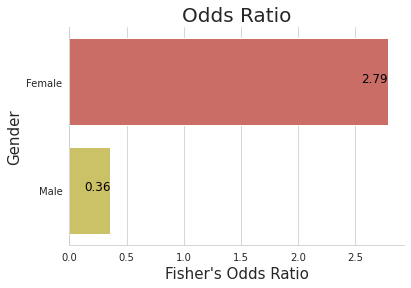

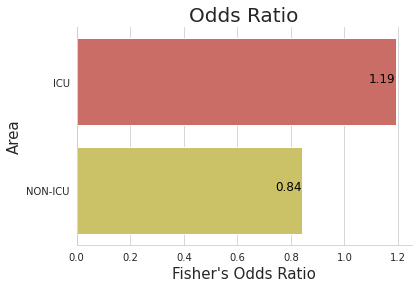

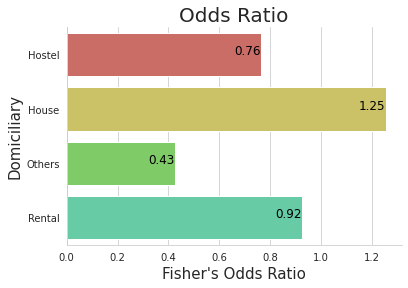

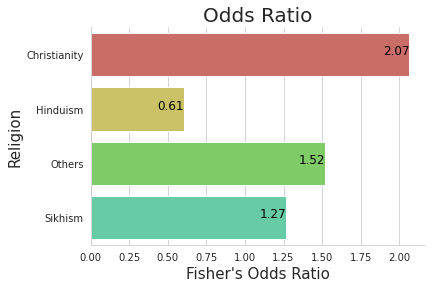

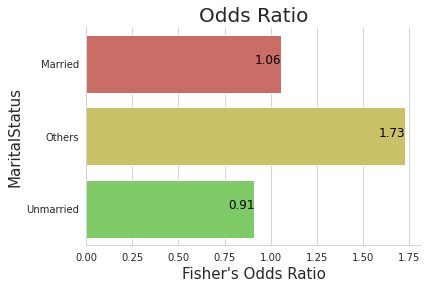

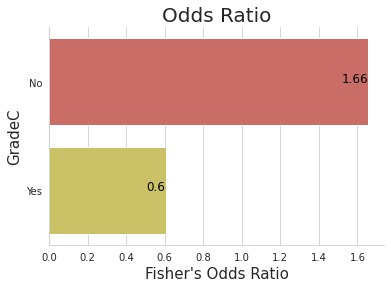

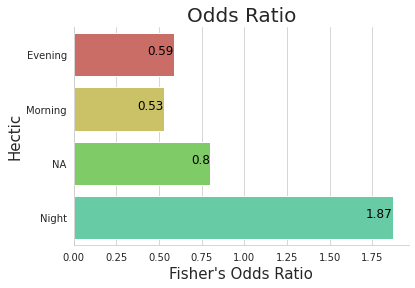

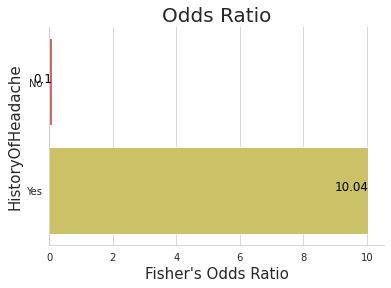

posx and posy should be finite values
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:398: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]
posx and posy should be finite values


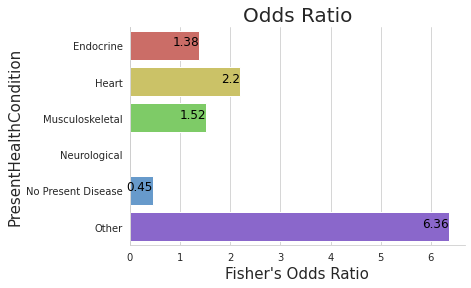

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


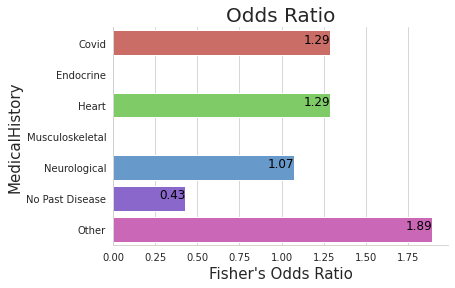

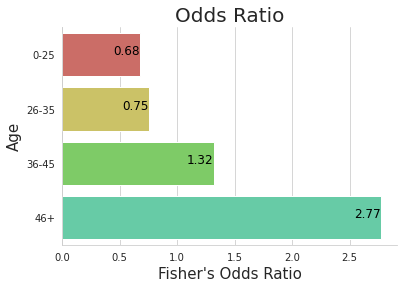

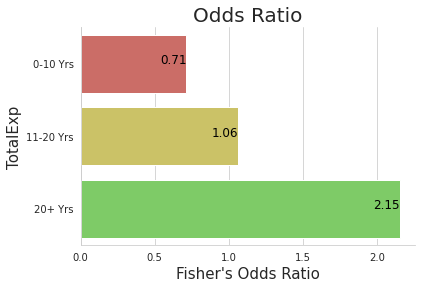

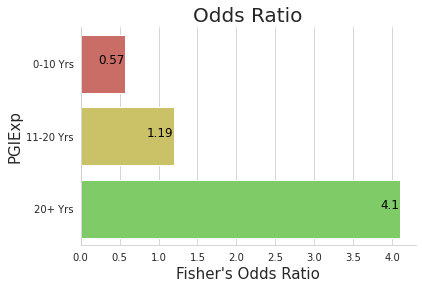

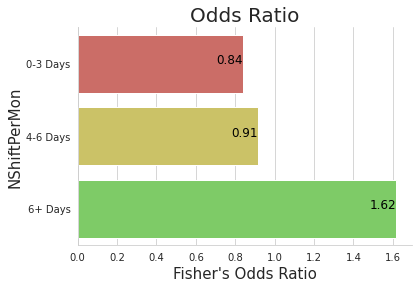

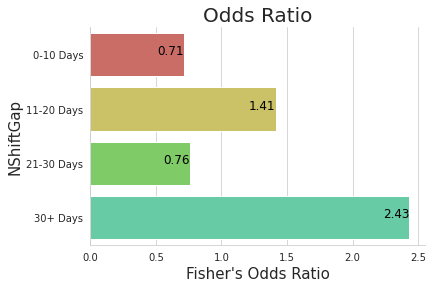

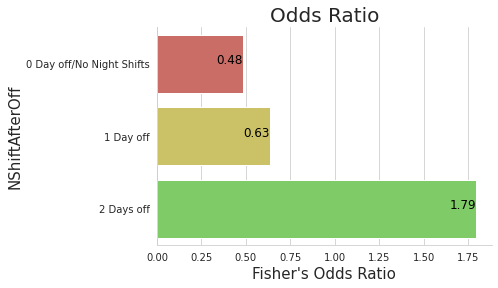

In [ ]:
n=1
r=2
for col in catCols:
  c=0
  r = catExplore(data[col],n,r,c)
  n += 1

(349, 68)


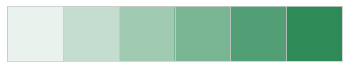

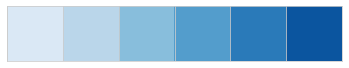

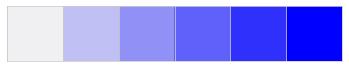

In [ ]:
font = ImageFont.truetype('times.ttf',13)
font2 = ImageFont.truetype('times.ttf',18)
pal = sns.light_palette("seagreen")
plot = sns.palplot(pal)
plt.savefig('SeaGreen.png',bbox_inches='tight')
img = Image.open('SeaGreen.png')
d1 = ImageDraw.Draw(img)
d1.text((28,28), '0', fill='#282828',font=font)
d1.text((308,28),'300',fill='#000000',font=font)
d1.text((140,28),'Frequency',fill='#FFFFFF',font=font2)
img.save('SeaGreen.png')
r+=2
worksheet.insert_image(r,0,'SeaGreen.png',{'align': 'center','valign': 'vcenter'})


pal = sns.color_palette("Blues")
plot = sns.palplot(pal)
plt.savefig('Blues.png',bbox_inches='tight')
img = Image.open('Blues.png')
d1 = ImageDraw.Draw(img)
d1.text((28,28), '0', fill='#282828',font=font)
d1.text((308,28),'15',fill='#000000',font=font)
d1.text((140,28),'Chi Square',fill='#FFFFFF',font=font2)
img.save('Blues.png')
r+=5
worksheet.insert_image(r,0,'Blues.png',{'align': 'center','valign': 'vcenter'})

pal = sns.color_palette("light:b")
plot = sns.palplot(pal)
plt.savefig('lightb.png',bbox_inches='tight')
img = Image.open('lightb.png')
d1 = ImageDraw.Draw(img)
print(img.size)
d1.text((28,28), '0', fill='#282828',font=font)
d1.text((308,28),'1',fill='#000000',font=font)
d1.text((140,28),'p value',fill='#FFFFFF',font=font2)
img.save('lightb.png')
r+=5
worksheet.insert_image(r,0,'lightb.png',{'align': 'center','valign': 'vcenter'})

workbook.close()

## Interpretation:
The odds of Having a Headache 2.06557 higher given that the person is a Christian compared to if he belonged from Hinduism, Sikhism, or other religions.

## Alternative way to calculate Odds ratio.

This Odds Ratio tables will be shown as:
<table>
<tr>
<th>Feature</th>
<th>C1</th>
<th>C2</th>
<th>C3</th>
</tr>
<tr>
<td>C1</td>
<td>*****</td>
<td>C2/C1</td>
<td>C3/C1</td>
</tr>
<tr>
<td>C2</td>
<td>C1/C2</td>
<td>*****</td>
<td>C3/C2</td>
</tr>
<tr>
<td>C3</td>
<td>C1/C3</td>
<td>C2/C3</td>
<td>*****</td>
</tr>
</table>

In [ ]:
table = pd.crosstab(data['Target'],data['Religion'])
ORdf = pd.DataFrame(columns=table.columns,index=table.columns)
ORdf = ORdf.fillna('-')
outerList = list(range(table.shape[1]))
for j in outerList:
  innerList = [x for x in outerList if x!=j]
  for i in innerList:
    tab = np.array([table.iloc[:,i],table.iloc[:,j]])
    OR = fisher_exact(tab)
    ORdf.at[ORdf.index[j],table.columns[i]] = OR
ORdf.head()

Religion,Christianity,Hinduism,Others,Sikhism
Religion,,,,
Christianity,-,"(0.42592592592592593, 0.10133046257666428)","(0.7777777777777778, 1.0)","(0.6161616161616161, 0.4716893001988124)"
Hinduism,"(2.347826086956522, 0.10133046257666437)",-,"(1.826086956521739, 0.7200741598937281)","(1.4466403162055337, 0.2525697103907649)"
Others,"(1.2857142857142858, 1.0)","(0.5476190476190477, 0.7200741598937281)",-,"(0.7922077922077922, 1.0)"
Sikhism,"(1.6229508196721312, 0.4716893001988128)","(0.6912568306010929, 0.2525697103907653)","(1.2622950819672132, 1.0)",-
